In [2]:
import pandas as pd
import numpy as np
import scipy.stats

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from adjustText import adjust_text
%matplotlib inline
plt.rcParams["figure.dpi"] = 100
sns.set_palette("muted")
sns.set_context("paper")
sns.set_style("whitegrid")
plt.rcParams['font.sans-serif'] = ["FreeSans"]
from textwrap import wrap

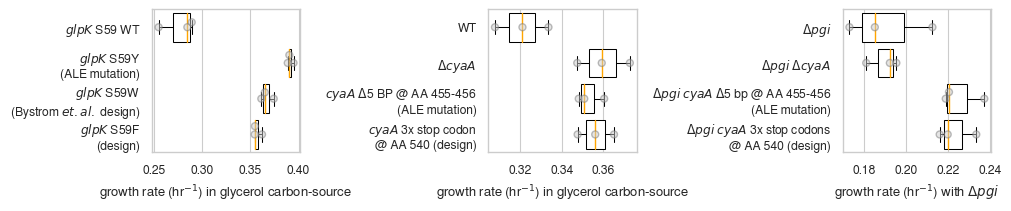

In [78]:
plt.rcParams["figure.dpi"] = 100
sns.set_palette("muted")
sns.set_context("paper")
sns.set_style("whitegrid")
plt.rcParams['font.sans-serif'] = ["FreeSans"]

boxplot_kwargs = {
    'boxprops': {'edgecolor': 'k', 'linewidth': 0.75},
    'whiskerprops': {'color': 'k', 'linewidth': 0.75},
    'medianprops': {'color': 'orange', 'linewidth': 1},
    'capprops': {'color': 'k', 'linewidth': 0.75},
    'flierprops': {'marker': 'd', 'markerfacecolor': "black", 'markeredgecolor': "black"}
}

plt.rcParams['figure.constrained_layout.use'] = True  # for some reason, this adds enough horizontal space between plots
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(10,2))

growth_rate_d = {
    "$\it{glpK}$ S59 WT": [0.2843521465, 0.2544827872, 0.2888920837],
    "$\it{glpK}$ S59Y\n(ALE mutation)": [0.388742, 0.390412, 0.394758],
    "$\it{glpK}$ S59W\n(Bystrom $\it{et. al.}$ design)": [0.3649051676, 0.3612638861, 0.3741623925],
    "$\it{glpK}$ S59F\n(design)": [0.3546362178, 0.36200296, 0.3543757514]
}
df = pd.DataFrame.from_dict(growth_rate_d, orient='index')
sns.boxplot( data=df.T, color="white", orient="h", ax=axs[0], **boxplot_kwargs  )
sns.swarmplot( data=df.T, orient="h", color="0.8", alpha=0.5, linewidth=1, ax=axs[0], )
axs[0].set_xlabel("growth rate (hr$^{-1}$) in glycerol carbon-source")


growth_rate_d = {
    "WT": [0.333575814, 0.307703999, 0.320995885],
    "Δ$\it{cyaA}$": [0.3729286433, 0.3474839402, 0.3593327199],
    "$\it{cyaA}$ Δ5 BP @ AA 455-456\n(ALE mutation)" :[0.3508843077, 0.3605006902, 0.3482038948],
    "$\it{cyaA}$ 3x stop codon\n@ AA 540 (design)": [0.347666956, 0.3561745732, 0.3652640112]
}
df = pd.DataFrame.from_dict(growth_rate_d, orient='index')
sns.boxplot( data=df.T, color="white", orient="h", ax=axs[1], **boxplot_kwargs  )
sns.swarmplot( data=df.T, orient="h", color="0.8", alpha=0.5, linewidth=1, ax=axs[1], )
axs[1].set_xlabel("growth rate (hr$^{-1}$) in glycerol carbon-source")

growth_rate_d = {
    "Δ$\it{pgi}$": [0.172859, 0.184991, 0.212495],
    "Δ$\it{pgi}$ Δ$\it{cyaA}$": [0.192159, 0.180873, 0.195267],
    "Δ$\it{pgi}$ $\it{cyaA}$ Δ5 bp @ AA 455-456\n(ALE mutation)": [0.237267, 0.220393, 0.218842],
    "Δ$\it{pgi}$ $\it{cyaA}$ 3x stop codons\n@ AA 540 (design)": [0.215948, 0.219787, 0.23343],
}
df = pd.DataFrame.from_dict(growth_rate_d, orient='index')
sns.boxplot( data=df.T, color="white", orient="h", ax=axs[2], **boxplot_kwargs  )
sns.swarmplot( data=df.T, orient="h", color="0.8", alpha=0.5, linewidth=1, ax=axs[2])
axs[2].set_xlabel("growth rate (hr$^{-1}$) with Δ$\it{pgi}$")


plt.savefig('./figs/gdmuts_f6_g_h_i.svg')

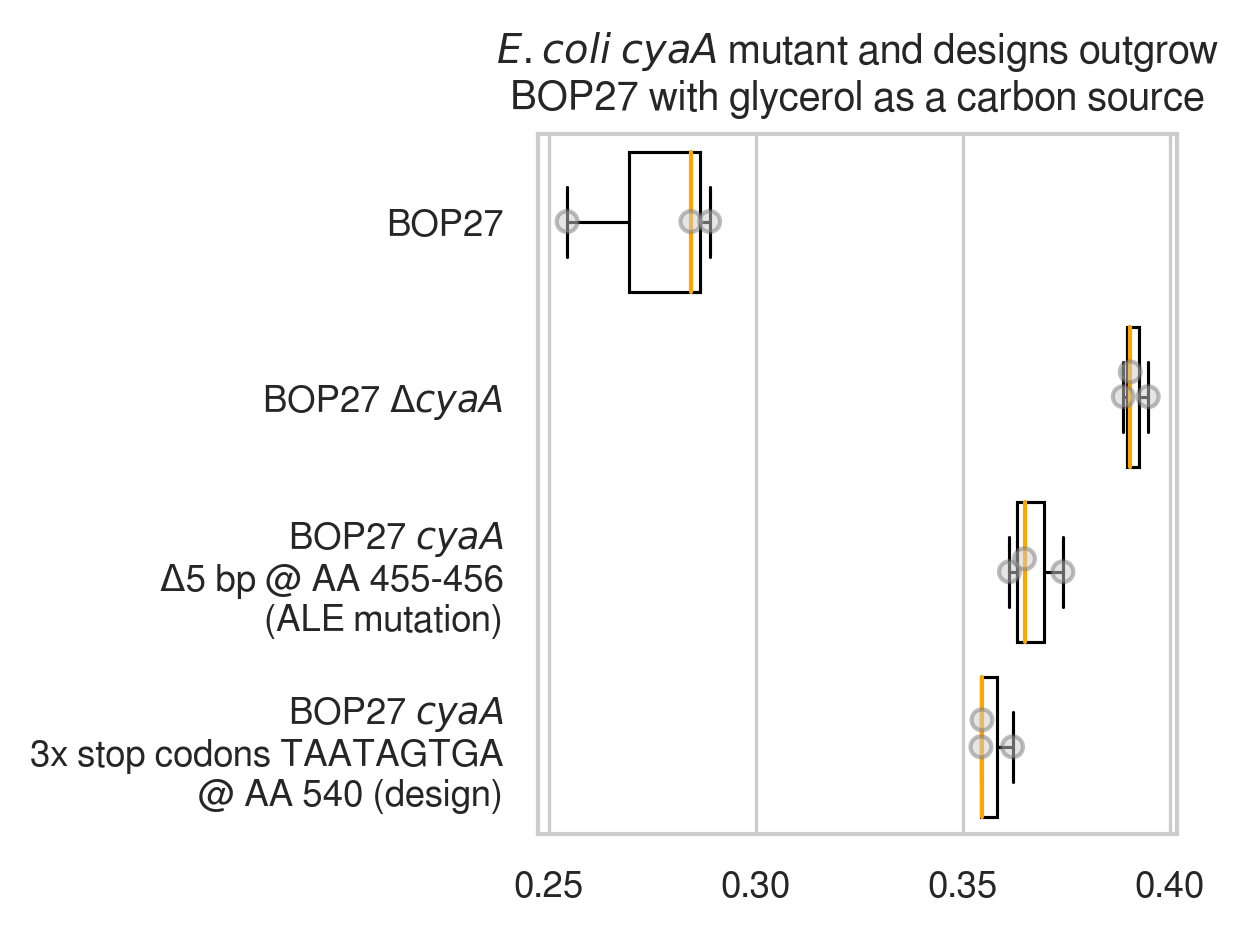

In [57]:
growth_rate_d = {
    "BOP27": [0.2843521465, 0.2544827872, 0.2888920837],
    "BOP27 Δ$\it{cyaA}$": [0.388742, 0.390412, 0.394758],
    "BOP27 $\it{cyaA}$\nΔ5 bp @ AA 455-456\n(ALE mutation)": [0.3649051676, 0.3612638861, 0.3741623925],
    "BOP27 $\it{cyaA}$\n3x stop codons TAATAGTGA\n@ AA 540 (design)": [0.3546362178, 0.36200296, 0.3543757514]
}

df = pd.DataFrame.from_dict(growth_rate_d, orient='index')
plt.figure(figsize=(4,3))
ax = sns.boxplot( data=df.T, color="white", orient="h", **boxplot_kwargs  )
sns.swarmplot( data=df.T, orient="h", color="0.8", alpha=0.5, linewidth=1, ax=ax)
# axs[0].set_xlabel("growth rate (hr$^{-1}$) with isobutyrate(12.5 g/L)") 
ax.set_title("$\it{E. coli}$ $\it{cyaA}$ mutant and designs outgrow\nBOP27 with glycerol as a carbon source")
plt.show()

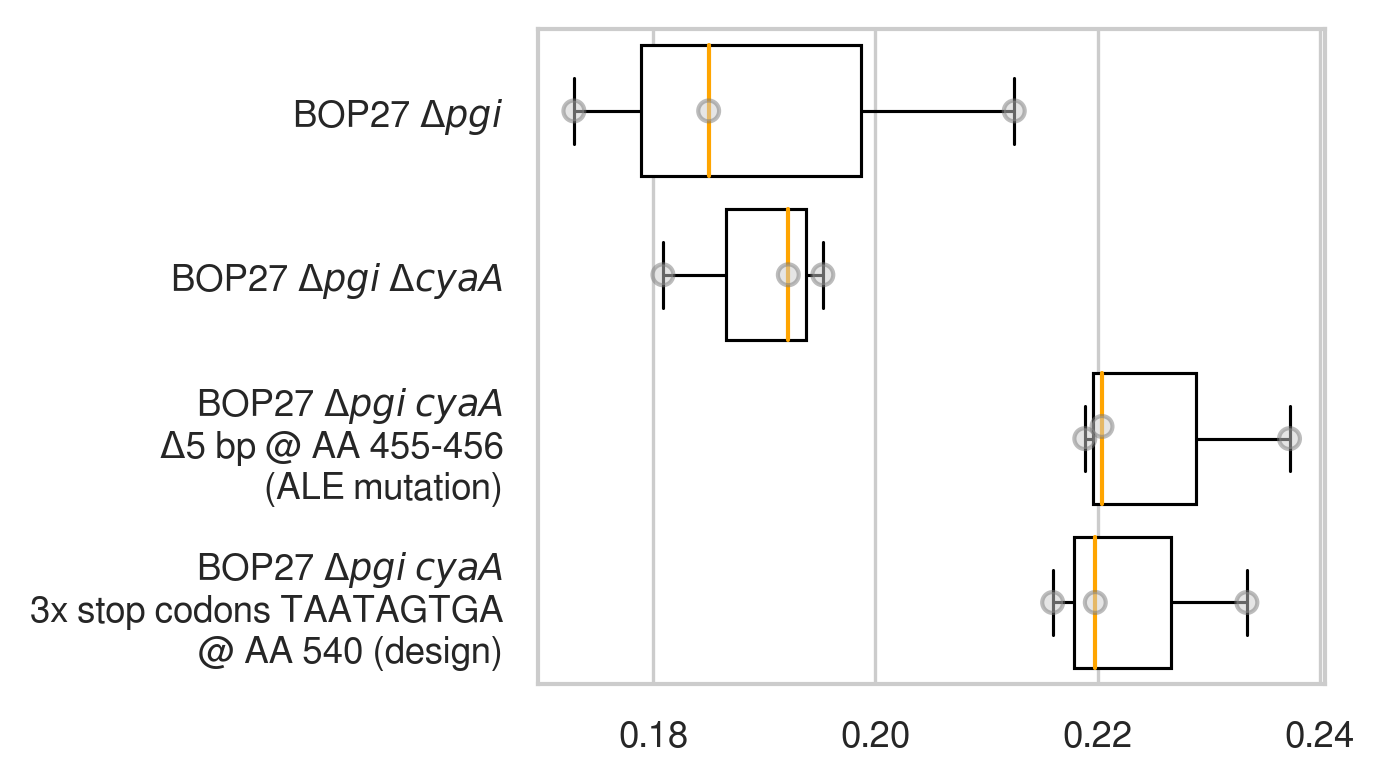

In [58]:
growth_rate_d = {
    "BOP27 Δ$\it{pgi}$": [0.172859, 0.184991, 0.212495],
    "BOP27 Δ$\it{pgi}$ Δ$\it{cyaA}$": [0.192159, 0.180873, 0.195267],
    "BOP27 Δ$\it{pgi}$ $\it{cyaA}$\nΔ5 bp @ AA 455-456\n(ALE mutation)": [0.237267, 0.220393, 0.218842],
    "BOP27 Δ$\it{pgi}$ $\it{cyaA}$\n3x stop codons TAATAGTGA\n@ AA 540 (design)": [0.215948, 0.219787, 0.23343],
}

df = pd.DataFrame.from_dict(growth_rate_d, orient='index')
plt.figure(figsize=(4.5,2.5))
ax = sns.boxplot( data=df.T, color="white", orient="h", **boxplot_kwargs  )
sns.swarmplot( data=df.T, orient="h", color="0.8", alpha=0.5, linewidth=1, ax=ax)
# axs[0].set_xlabel("growth rate (hr$^{-1}$) with isobutyrate(12.5 g/L)") 
# ax.set_title("$\it{E. coli}$ PykF mutant in low glucose")
plt.show()

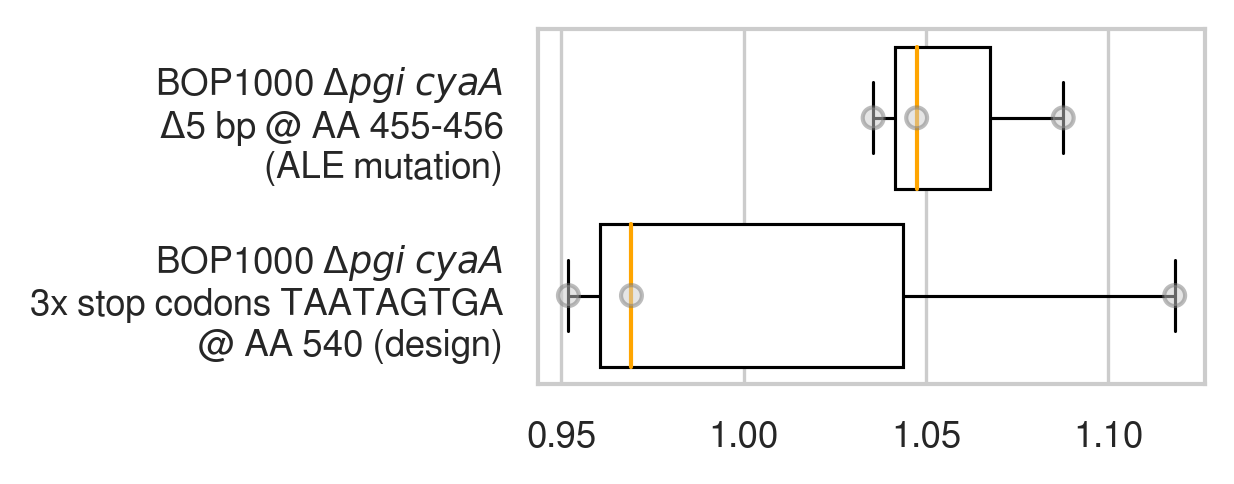

In [59]:
growth_rate_d = {
    "BOP1000 Δ$\it{pgi}$ $\it{cyaA}$\nΔ5 bp @ AA 455-456\n(ALE mutation)": [1.047445, 1.08763, 1.035517],
    "BOP1000 Δ$\it{pgi}$ $\it{cyaA}$\n3x stop codons TAATAGTGA\n@ AA 540 (design)": [0.951976, 0.969264, 1.118182],
}

df = pd.DataFrame.from_dict(growth_rate_d, orient='index')
plt.figure(figsize=(4,1.5))
ax = sns.boxplot( data=df.T, color="white", orient="h", **boxplot_kwargs  )
sns.swarmplot( data=df.T, orient="h", color="0.8", alpha=0.5, linewidth=1, ax=ax)
plt.show()

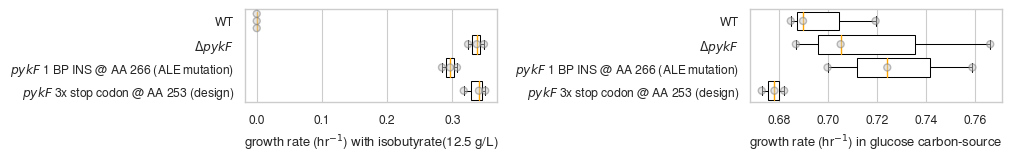

In [60]:
plt.rcParams["figure.dpi"] = 100
sns.set_palette("muted")
sns.set_context("paper")
sns.set_style("whitegrid")
plt.rcParams['font.sans-serif'] = ["FreeSans"]

boxplot_kwargs = {
    'boxprops': {'edgecolor': 'k', 'linewidth': 0.75},
    'whiskerprops': {'color': 'k', 'linewidth': 0.75},
    'medianprops': {'color': 'orange', 'linewidth': 1},
    'capprops': {'color': 'k', 'linewidth': 0.75},
    'flierprops': {'marker': 'd', 'markerfacecolor': "black", 'markeredgecolor': "black"}
}

plt.rcParams['figure.constrained_layout.use'] = True  # for some reason, this adds enough horizontal space between plots
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(10,1.5))


growth_rate_d = {
    "WT": [0, 0, 0],
    "Δ$\it{pykF}$": [0.3242, 0.348629, 0.337649],
    "$\it{pykF}$ 1 BP INS @ AA 266 (ALE mutation)": [0.296580463035264, 0.307229709278863, 0.28421420667125],
    "$\it{pykF}$ 3x stop codon @ AA 253 (design)" :[0.3176, 0.350594, 0.340874],
}
df = pd.DataFrame.from_dict(growth_rate_d, orient='index')
sns.boxplot( data=df.T, color="white", orient="h", ax=axs[0], **boxplot_kwargs  )
sns.swarmplot( data=df.T, orient="h", color="0.8", alpha=0.5, linewidth=1, ax=axs[0])
axs[0].set_xlabel("growth rate (hr$^{-1}$) with isobutyrate(12.5 g/L)") 


growth_rate_d = {
    "WT": [0.6848260127, 0.6898131542, 0.7193738142],
    "Δ$\it{pykF}$": [0.7660577044, 0.686898713, 0.7051382691],
    "$\it{pykF}$ 1 BP INS @ AA 266 (ALE mutation)" :[0.758803274, 0.699784, 0.724124848],
    "$\it{pykF}$ 3x stop codon @ AA 253 (design)" :[0.6781563677, 0.6729968019, 0.6821332428],
}
df = pd.DataFrame.from_dict(growth_rate_d, orient='index')
sns.boxplot( data=df.T, color="white", orient="h", ax=axs[1], **boxplot_kwargs  )
sns.swarmplot( data=df.T, orient="h", color="0.8", alpha=0.5, linewidth=1, ax=axs[1])
axs[1].set_xlabel("growth rate (hr$^{-1}$) in glucose carbon-source")

plt.savefig('./figs/gdmuts_f7_d_e.svg')